<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/algortmovehiculosArbolDesicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sheet_id ='1hSCgq0sKpE_O2XI55UfuVPkA6lYoySZSCE7KWhdxWNY'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'

dp = pd.read_csv(sheet_url, header=5)
print(dp.head())

           Fecha  ITEM CODIGO DE EQUIPO Tipo de Vehiculo fecha de revision  \
0            NaN   1.0  VE-DT-CH-XMD284     CARRO TANQUE         5/23/2025   
1            NaN   2.0  VE-DT-FL-XMD588      DOBLETROQUE         5/23/2025   
2            NaN   3.0  VE-DT-FL-SUE755      DOBLETROQUE         5/23/2025   
3  5/23/25 17:32   4.0  VE-DT-FL-WFD547      DOBLETROQUE         5/23/2025   
4  5/23/25 17:32   5.0  VE-DT-IN-TAV909      DOBLETROQUE         5/23/2025   

  Km/ Hr Plan  Fecha Ult Pre-Operacional  Dias Pend   Ult Km/Hr Km/Hr Cambio  \
0     10,000                     45797.0        3.0    320,832      316,580    
1     10,000                     45190.0      610.0    209,543      199,850    
2      8,000                     45797.0        3.0    431,842       429,813   
3     10,000                     45797.0        3.0    269,735       263,671   
4     10,000                     45797.0        3.0    288,404      287,932    

   Fecha Cambio  Fecha Prox Cambio  Unnamed: 12 Km

In [7]:
data = {
    'km_hr_pend': dp['Km/Hr Pend'].tolist(),
    'progreso2': dp['Progreso2'].tolist(),
    # ... otras columnas si las tienes
}
dx = pd.DataFrame(data)

In [8]:
dx['km_hr_pend'] = pd.to_numeric(dx['km_hr_pend'], errors='coerce')
dx['progreso2'] = pd.to_numeric(dx['progreso2'], errors='coerce')


In [10]:
def clasificar_riesgo(progreso2, km_hr_pend):
    if progreso2 > 90 or km_hr_pend < 0:
        return 'Alto'
    elif 70 <= progreso2 <= 90:
        return 'Medio'
    else:
        return 'Bajo'

dx['riesgo'] = dx.apply(lambda row: clasificar_riesgo(row['progreso2'], row['km_hr_pend']), axis=1)

In [11]:
X = dx[['progreso2', 'km_hr_pend']]
y = dx['riesgo']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Predicción en test
y_pred = modelo_arbol.predict(X_test)

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[1 0 0]
 [0 6 0]
 [0 0 1]]

Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         1
        Bajo       1.00      1.00      1.00         6
       Medio       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [32]:
nuevo = pd.DataFrame([[10, 10.1]], columns=['progreso2', 'km_hr_pend'])
prediccion = modelo_arbol.predict(nuevo)
print(f"Predicción para progreso={nuevo.iloc[0, 0]} y km_hr_pend={nuevo.iloc[0, 1]}: {prediccion[0]}")

Predicción para progreso=10 y km_hr_pend=10.1: Bajo


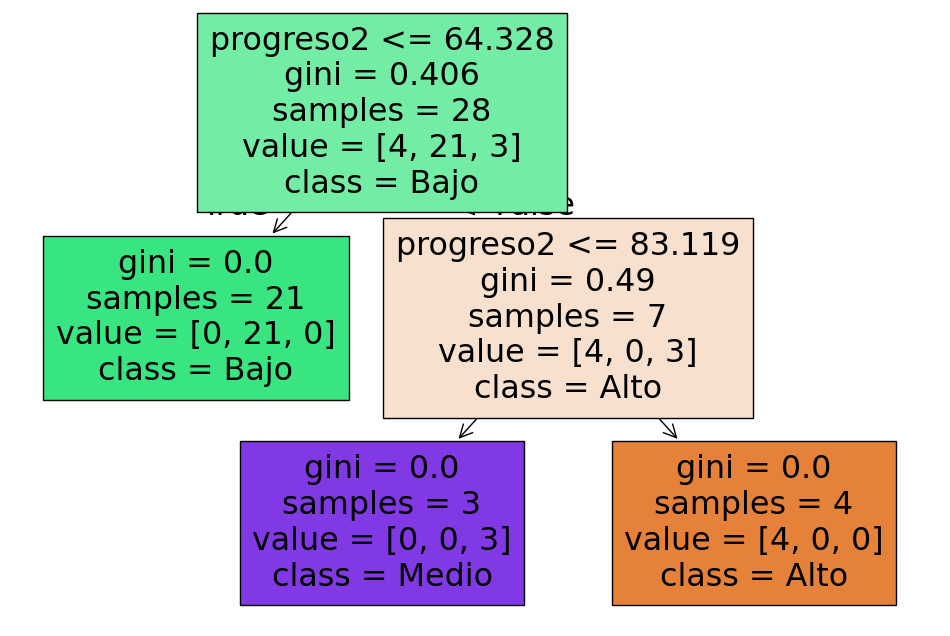

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(modelo_arbol, feature_names=['progreso2', 'km_hr_pend'], class_names=modelo_arbol.classes_, filled=True)
plt.show()